In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Convolution(img, mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                   +  img[i-1, j]      * mask[0, 1]\
                   +  img[i-1, j + 1]  * mask[0, 2]\
                   +  img[i, j-1]      * mask[1, 0]\
                   +  img[i, j]        * mask[1, 1]\
                   +  img[i, j + 1]    * mask[1, 2]\
                   +  img[i + 1, j-1]  * mask[2, 0]\
                   +  img[i + 1, j]    * mask[2, 1]\
                   +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new

#Định nghĩa hàm tích chập cho trường hợp tổng quát:
def ConvolutionOvr(img, mask):
    mask_height, mask_width = mask.shape
    img_height, img_width = img.shape
    img_new = np.zeros_like(img)
    mask_half_height = mask_height // 2
    mask_half_width = mask_width // 2

    for i in range(mask_half_height, img_height - mask_half_height):
        for j in range(mask_half_width, img_width - mask_half_width):
            temp = 0
            for m in range(-mask_half_height, mask_half_height + 1):
                for n in range(-mask_half_width, mask_half_width + 1):
                    temp += img[i + m, j + n] * mask[mask_half_height + m, mask_half_width + n]
            img_new[i, j] = temp

    img_new = img_new.astype(np.uint8)
    return img_new

In [3]:
#Định nghĩa hàm lọc Gaussian cho trường hợp tổng quát
def gaussian_filter(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2*sigma**2)), (size, size))
    kernel /= np.sum(kernel)
    return kernel

In [4]:
#Định nghĩa bộ lọc trung bình
MeanFilter3x3 = np.array(([1/9,1/9,1/9],
                         [1/9,1/9,1/9],
                         [1/9,1/9,1/9]), dtype="float")

#Định nghĩa bộ lọc trung bình có trọng số
WeightedMeanFilter3x3 = np.array(([1/16, 2/16, 1/16],
                                  [2/16, 4/16, 2/16],
                                  [1/16, 2/16, 1/16]), dtype="float")

#Định nghĩa bộ lọc Gaussian
GaussianFilter3x3 = np.array(([0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976],
                              [0.1238/4.8976, 0.2042/4.8976, 0.1238/4.8976],
                              [0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976]), dtype="float")


In [5]:
#Định nghĩa hàm lọc trung vị
def MedianFilterFunction(img):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            temp = [img[i - 1, j - 1],
                    img[i - 1, j],
                    img[i - 1, j + 1],
                    img[i, j - 1],
                    img[i, j],
                    img[i, j + 1],
                    img[i + 1, j - 1],
                    img[i + 1, j],
                    img[i + 1, j + 1]]
            temp = sorted(temp)
            img_new[i, j] = temp[4]
    return img_new

#Định nghĩa hàm lọc trung vị cho trường hợp tổng quát (filter_size)
def MedianFilterFunctionOvr(img, filter_size):
    m, n = img.shape
    img_new = np.zeros_like(img)
    filter_half_size = filter_size // 2

    for i in range(filter_half_size, m - filter_half_size):
        for j in range(filter_half_size, n - filter_half_size):
            temp = []
            for k in range(-filter_half_size, filter_half_size + 1):
                for l in range(-filter_half_size, filter_half_size + 1):
                    temp.append(img[i + k, j + l])
            temp.sort()
            img_new[i, j] = temp[len(temp) // 2]

    return img_new

In [6]:
#Định nghĩa hàm lọc Max
def MaxFilterFunction(img):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            temp = [img[i - 1, j - 1],
                    img[i - 1, j],
                    img[i - 1, j + 1],
                    img[i, j - 1],
                    img[i, j],
                    img[i, j + 1],
                    img[i + 1, j - 1],
                    img[i + 1, j],
                    img[i + 1, j + 1]]
            temp = max(temp)
            img_new[i, j] = temp
    return img_new

#Định nghĩa hàm lọc max cho trường hợp tổng quát (chọn filter_size)
def MaxFilterFunctionOvr(img, filter_size):
    m, n = img.shape
    img_new = np.zeros_like(img)
    filter_half_size = filter_size // 2

    for i in range(filter_half_size, m - filter_half_size):
        for j in range(filter_half_size, n - filter_half_size):
            temp = []
            for k in range(-filter_half_size, filter_half_size + 1):
                for l in range(-filter_half_size, filter_half_size + 1):
                    temp.append(img[i + k, j + l])
            img_new[i, j] = max(temp)

    return img_new

In [7]:
path = 'image_1.tif'

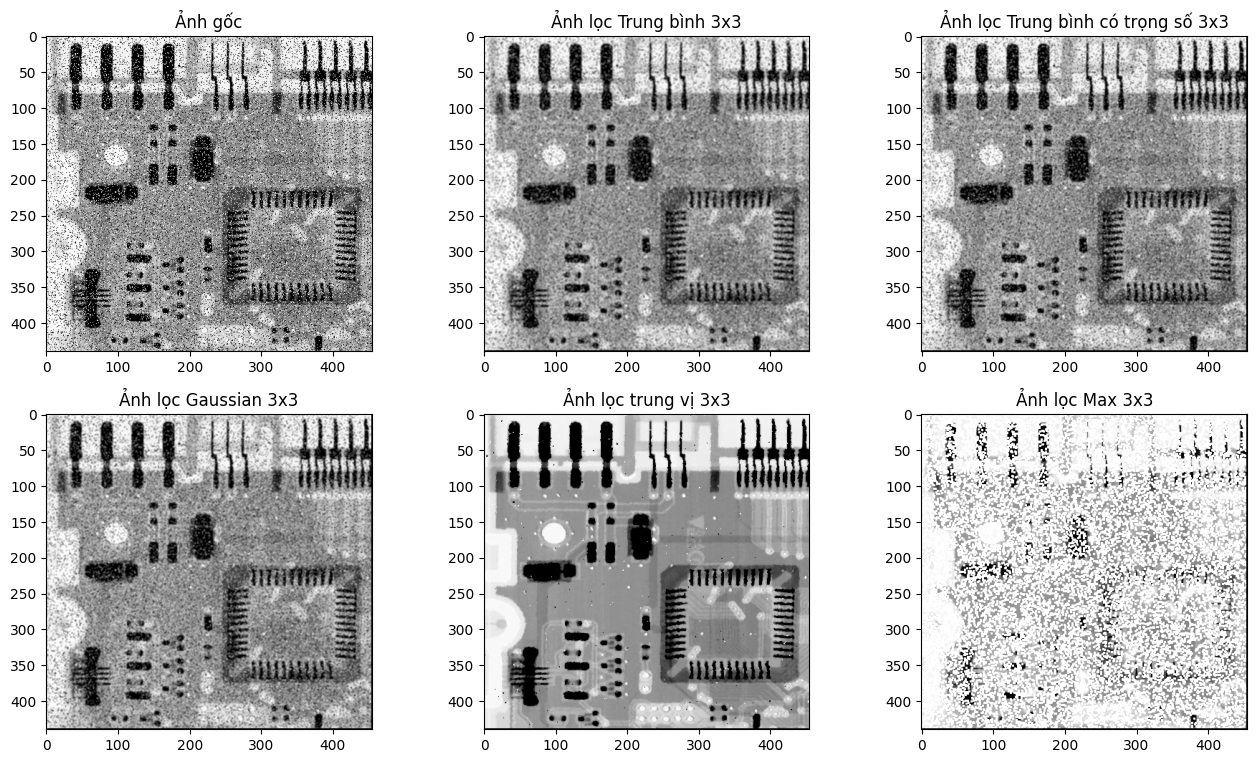

In [8]:
# Tạo vùng vẽ tỉ lệ 16/9 và tạo 6 vùng vẽ con để hiển thị ảnh lọc
fig = plt.figure(figsize=(16,9))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

# Đọc và hiển thị ảnh gốc
image = cv2.imread(path, 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc trung bình (mean) và hiển thị ảnh
img_Mean_Filter_3x3 = Convolution(image, MeanFilter3x3)
ax2.imshow(img_Mean_Filter_3x3, cmap='gray')
ax2.set_title("Ảnh lọc Trung bình 3x3")

# Lọc trung bình có trọng số (weighted mean) và hiển thị ảnh
img_Weighted_Mean_Filter_3x3 = Convolution(image, WeightedMeanFilter3x3)
ax3.imshow(img_Weighted_Mean_Filter_3x3, cmap='gray')
ax3.set_title("Ảnh lọc Trung bình có trọng số 3x3")

# Lọc Gaussian và hiển thị ảnh
img_Gaussian_Filter_3x3 = Convolution(image, GaussianFilter3x3)
ax4.imshow(img_Gaussian_Filter_3x3, cmap='gray')
ax4.set_title("Ảnh lọc Gaussian 3x3")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_3x3 = MedianFilterFunction(image)
ax5.imshow(img_Median_Filter_3x3, cmap='gray')
ax5.set_title("Ảnh lọc trung vị 3x3")

# Lọc Max và hiển thị ảnh
img_Max_Filter_3x3 = MaxFilterFunction(image)
ax6.imshow(img_Max_Filter_3x3, cmap='gray')
ax6.set_title("Ảnh lọc Max 3x3")

#Hiển thị vùng vẽ
plt.show()


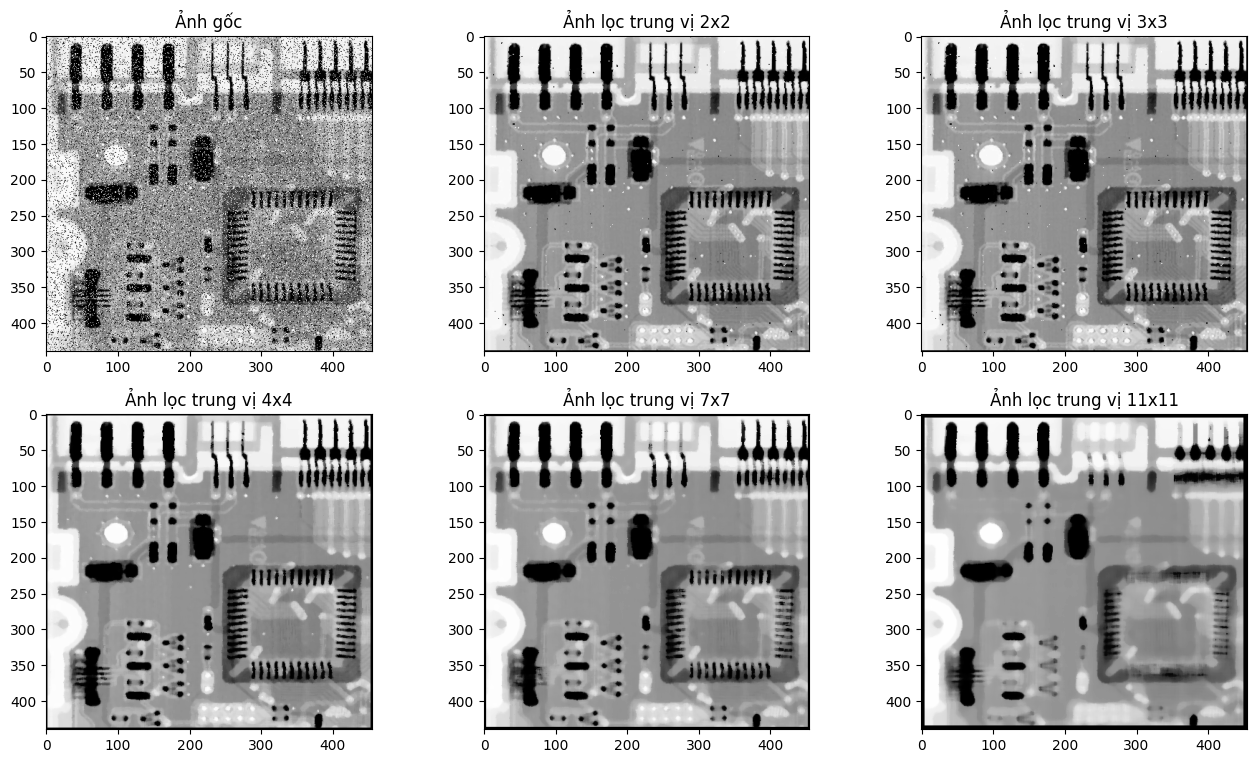

In [9]:
# Tạo vùng vẽ tỉ lệ 16/9 và tạo 6 vùng vẽ con để hiển thị ảnh lọc
fig = plt.figure(figsize=(16,9))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

# Đọc và hiển thị ảnh gốc
image = cv2.imread(path, 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_2x2 = MedianFilterFunctionOvr(image, 2)
ax2.imshow(img_Median_Filter_2x2, cmap='gray')
ax2.set_title("Ảnh lọc trung vị 2x2")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_3x3 = MedianFilterFunctionOvr(image, 3)
ax3.imshow(img_Median_Filter_3x3, cmap='gray')
ax3.set_title("Ảnh lọc trung vị 3x3")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_4x4 = MedianFilterFunctionOvr(image, 4)
ax4.imshow(img_Median_Filter_4x4, cmap='gray')
ax4.set_title("Ảnh lọc trung vị 4x4")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_7x7 = MedianFilterFunctionOvr(image, 7)
ax5.imshow(img_Median_Filter_7x7, cmap='gray')
ax5.set_title("Ảnh lọc trung vị 7x7")

# Lọc trung vị và hiển thị ảnh
img_Median_Filter_11x11 = MedianFilterFunctionOvr(image, 11)
ax6.imshow(img_Median_Filter_11x11, cmap='gray')
ax6.set_title("Ảnh lọc trung vị 11x11")

#Hiển thị vùng vẽ
plt.show()
